# Introduction

Training on cartplot, should be easy

In [4]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
%matplotlib inline

#Environment
seed = 14
env = gym.make('LunarLander-v2')
env.seed(seed)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
gamma, lr, tau = 0.99, 0.001, 0.1
agent = Agent(num_states, num_actions, lr, gamma, seed_num = seed)
agent.memory_size = 10**5
agent.batchsize = 512
learning_start = 500
agent.tau = tau


#Train
EPISODES = 2000
scores = []
t1 = time.time()
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    steps = 0

    while not done:
        #env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action_onehot = agent.act(state)
        action_scalar = np.dot(action_onehot,range(num_actions))
        next_state, reward, done, _ = env.step(action_scalar)
        reward_sum += reward
        agent.remember(state[0], action_onehot, reward, next_state, done)
        state = next_state
        
        if len(agent.memory) > learning_start:
            agent.train_models()
        steps += 1
    
    #Learn & print results
    scores.append(reward_sum)
    if e % 10 == 0:
        t2 = time.time()
        print '(episode, score, T (mins)) = ' + str((e,reward_sum, (t2-t1)/60.0))

#agent.save_target_weights()
plt.plot(scores)
#np.savetxt('stats/scores_inverted_pendulum.txt',scores)

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score, T (mins)) = (10, -749.9256104827539, 0.9842436194419861)
(episode, score, T (mins)) = (20, -573.511929010435, 5.2075024525324505)
(episode, score, T (mins)) = (30, -857.8944378459793, 9.138120766480764)


KeyboardInterrupt: 

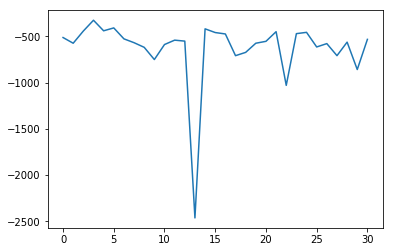

In [5]:
plt.plot(scores)

### Watch a smart agent

In [6]:
env.reset()
done = False
while not done:
    env.render()
    state = np.reshape(state, [1, num_states])  #reshape for keras
    action_onehot = agent.act(state)
    action_scalar = np.dot(action_onehot,range(num_actions))
    next_state, reward, done, _ = env.step(action_scalar)
    reward_sum += reward
    state = next_state
    #print 'position = ' + str( state[0] )
env.close()

position = -0.582154472906738
position = -0.5832848376297515
position = -0.584969945111537
position = -0.5871973648513945
position = -0.5899506838852352
position = -0.5932096434444356
position = -0.5969503079830606
position = -0.6011452652617376
position = -0.6057638558187356
position = -0.6107724297710425
position = -0.616134628481088
position = -0.6218116882134155
position = -0.6277627625088545
position = -0.6339452596426426
position = -0.6403151912292011
position = -0.6468275278105234
position = -0.6534365571352087
position = -0.6600962408145397
position = -0.6667605651385435
position = -0.6733838820501744
position = -0.6799212366044438
position = -0.6863286776698826
position = -0.6925635491448355
position = -0.6985847595389303
position = -0.7043530283856863
position = -0.7098311085792396
position = -0.7149839843402906
position = -0.7197790450890214
position = -0.7241862360141744
position = -0.7281781865599106
position = -0.7317303183921272
position = -0.7348209346450875
position = 